# Predicting Student Admissions with Neural Networks
This notebook is part of an assignment on Udacity - Intro to Pytorch

The idea is to predict whether a student will be able to secure admission or not at UCLA based on the follwoing factors:
- GRE Scores (Test)
- GPA Scores (Grades)
- Class rank (1-4)

The dataset originally came from here: http://www.ats.ucla.edu/

## Loading the data
To load the data and format it nicely, we will use two very useful packages called Pandas and Numpy.

In [2]:
# Importing pandas and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

student_data = pd.read_csv('/content/student_data.csv')

# Printing out the first 10 rows of our data
student_data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *['admit'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['gre'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['gpa'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['rank'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_4, *[[['admit', 'gre'], ['gre', 'gpa'], ['gpa', 'rank']]], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_5, *['admit'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_6, *['gre'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_7, *['gpa'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_8, *['rank'], **{})
chart

In [9]:
student_data.shape


(400, 4)

In [12]:
student_data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


## Plotting the data

First let's make a plot of our data to see how it looks. In order to have a 2D plot, let's ingore the rank.

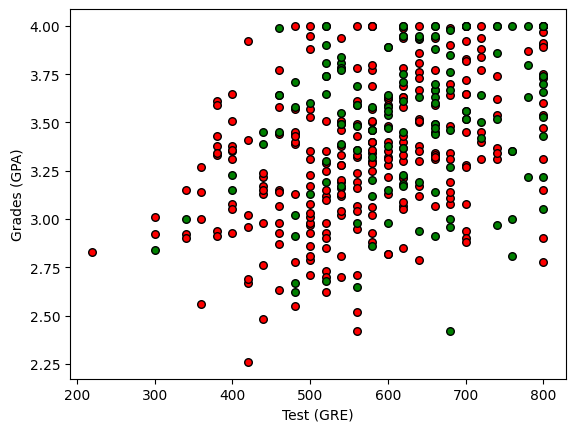

In [3]:

# Function to help us plot
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 30, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 30, color = 'green', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')


plot_points(student_data)
plt.show()

With some outliers, it looks like GRE is a more dominant factor when it comes to their selection. Overall, students with high scores in the grades and test passed, while the ones with low scores didn't, but the data is not as nicely separable as we hoped it would.

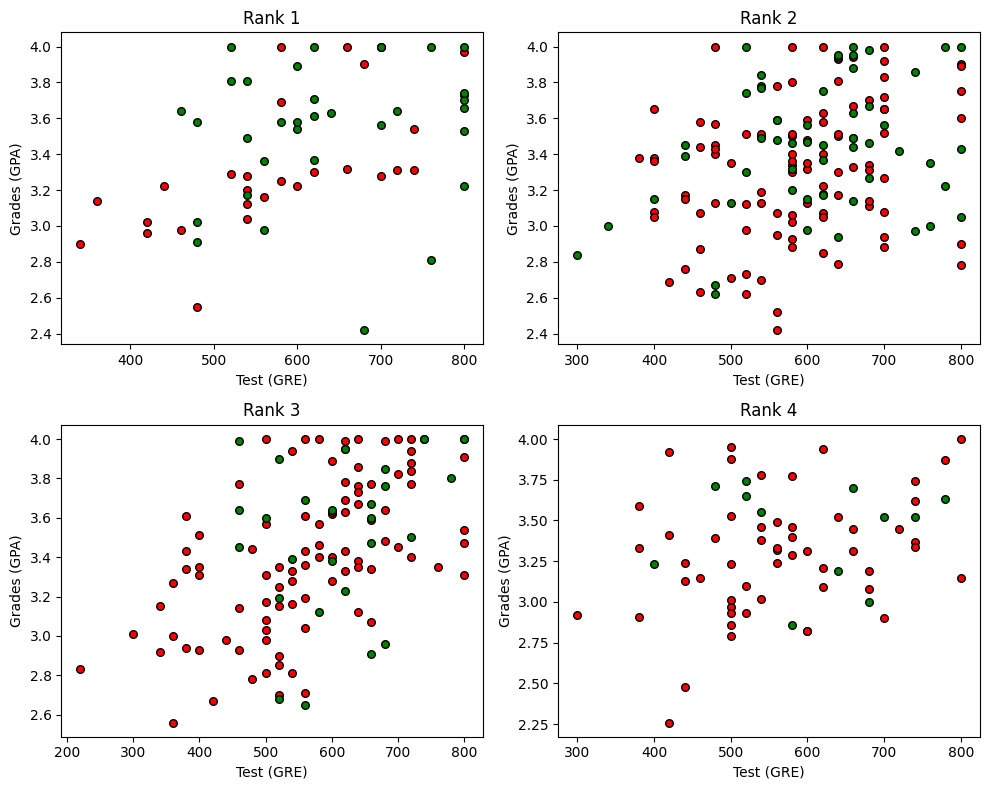

In [7]:
import matplotlib.pyplot as plt

# Create a figure with two rows and two columns
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Subplot 1 (Rank 1)
plt.sca(axs[0, 0])
plot_points(data_rank1)
plt.title("Rank 1")

# Subplot 2 (Rank 2)
plt.sca(axs[0, 1])
plot_points(data_rank2)
plt.title("Rank 2")

# Subplot 3 (Rank 3)
plt.sca(axs[1, 0])
plot_points(data_rank3)
plt.title("Rank 3")

# Subplot 4 (Rank 4)
plt.sca(axs[1, 1])
plot_points(data_rank4)
plt.title("Rank 4")

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


This looks more promising, as it seems that lower the rank, the higher the acceptance rate. Let's use the rank as one of our inputs. In order to do this, we should one-hot encode it.

## TODO: One-hot encoding the rank
Use the `get_dummies` function in Pandas in order to one-hot encode the data.

In [18]:
one_hot_data = pd.get_dummies(student_data, columns=['rank'])
one_hot_data.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [ ]:
# # TODO:  Make dummy variables for rank
# one_hot_data = pd.concat([student_data, pd.get_dummies(student_data['rank'], prefix = 'rank')], axis  = 1)

# # TODO: Drop the previous rank column
# one_hot_data = one_hot_data.drop('rank', axis =1)

# # Print the first 10 rows of our data
# one_hot_data.head()

## TODO: Scaling the data
The range for grades is 1.0-4.0, whereas the range for test scores is roughly 200-800. This means our data is skewed, and that makes it hard for a neural network to handle, which is much larger, which is why we need to scale the data. Let's fit our two features into a range of 0-1, by dividing the grades by 4.0, and the test score by 800.

In [20]:
# Making a copy of our data
scaled_data = one_hot_data[:]

# TODO: Scale the columns

# Printing the first 10 rows of our procesed data
scaled_data['gre'] = scaled_data['gre']/800
scaled_data['gpa'] = scaled_data['gpa']/4.0

scaled_data.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1


## Splitting the data into Training and Testing

In order to test our algorithm, we'll split the data into a Training and a Testing set. The size of the testing set will be 20% of the total data.

In [57]:
sample = np.random.choice(scaled_data.index, size=int(len(scaled_data)*0.92), replace=False)
train_data, test_data = scaled_data.iloc[sample], scaled_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
train_data.head()


Number of training samples is 368
Number of testing samples is 32


,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
138,0,0.775,0.8500,0,1,0,0
206,0,0.925,0.8850,1,0,0,0
63,1,0.850,0.9625,0,0,1,0
134,0,0.700,0.7375,0,1,0,0
66,0,0.925,0.9050,0,0,0,1


In [58]:
test_data.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
47,0,0.625,0.7425,0,0,0,1
57,0,0.475,0.7350,0,0,1,0
91,1,0.900,0.9100,1,0,0,0
95,0,0.825,0.8325,0,1,0,0


## Splitting the data into features and targets (labels)
Now, as a final step before the training, we'll split the data into features (X) and targets (y).

In [59]:
features = train_data.drop('admit', axis=1)
targets = train_data['admit']
features_test = test_data.drop('admit', axis=1)
targets_test = test_data['admit']
features.head()


,gre,gpa,rank_1,rank_2,rank_3,rank_4
138,0.775,0.8500,0,1,0,0
206,0.925,0.8850,1,0,0,0
63,0.850,0.9625,0,0,1,0
134,0.700,0.7375,0,1,0,0
66,0.925,0.9050,0,0,0,1


In [60]:
targets.head()

138    0
206    0
63     1
134    0
66     0
Name: admit, dtype: int64

## Training the 2-layer Neural Network
The following function trains the 2-layer neural network. First, we'll write some helper functions.

In [61]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# TODO: Backpropagate the error
Now it's your turn to shine. Write the error term. Remember that this is given by the equation $$ (y-\hat{y}) \sigma'(x) $$

In [62]:
# TODO: Write the error term formula
def error_term_formula(x, y, output):
    return (y-output)*x


In [63]:
# Neural Network hyperparameters
epochs = 500
learnrate = 0.2

# Training function
def train_nn(features, targets, epochs, learnrate):

    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):

            output = sigmoid(np.dot(x, weights))

            error = error_formula(y, output)

            error_term = error_term_formula(x, y, output)
            del_w += error_term * x

        weights += learnrate * del_w / n_records

        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights

weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.27276190127823186
Epoch: 50
Train loss:  0.20944383430614197
Epoch: 100
Train loss:  0.20704928862299693
Epoch: 150
Train loss:  0.2058990279605731
Epoch: 200
Train loss:  0.2052147530924218
Epoch: 250
Train loss:  0.20474466783617953
Epoch: 300
Train loss:  0.20437913734599264
Epoch: 350
Train loss:  0.20406819813798333
Epoch: 400
Train loss:  0.20378830354881347
Epoch: 450
Train loss:  0.20352796111231294
Finished training!


## Calculating the Accuracy on the Test Data

In [64]:
# Calculate accuracy on test data
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.719
